In [62]:
from eddy import rotationmap
import bettermoments as bm
from astropy.io import fits
from spectral_cube import SpectralCube
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

import matplotlib.font_manager as fm

In [63]:
ALMAData = fits.open('fits/member.uid___A001_X158f_Xb8.AT_Pyx_sci.spw25.cube.I.pbcor.fits')
cube = SpectralCube.read(ALMAData)
print(cube)

SpectralCube with shape=(3838, 512, 512) and unit=Jy / beam:
 n_x:    512  type_x: RA---SIN  unit_x: deg    range:   127.162535 deg:  127.176538 deg
 n_y:    512  type_y: DEC--SIN  unit_y: deg    range:   -33.778606 deg:  -33.766966 deg
 n_s:   3838  type_s: FREQ      unit_s: Hz     range: 229596267674.200 Hz:231469880529.700 Hz


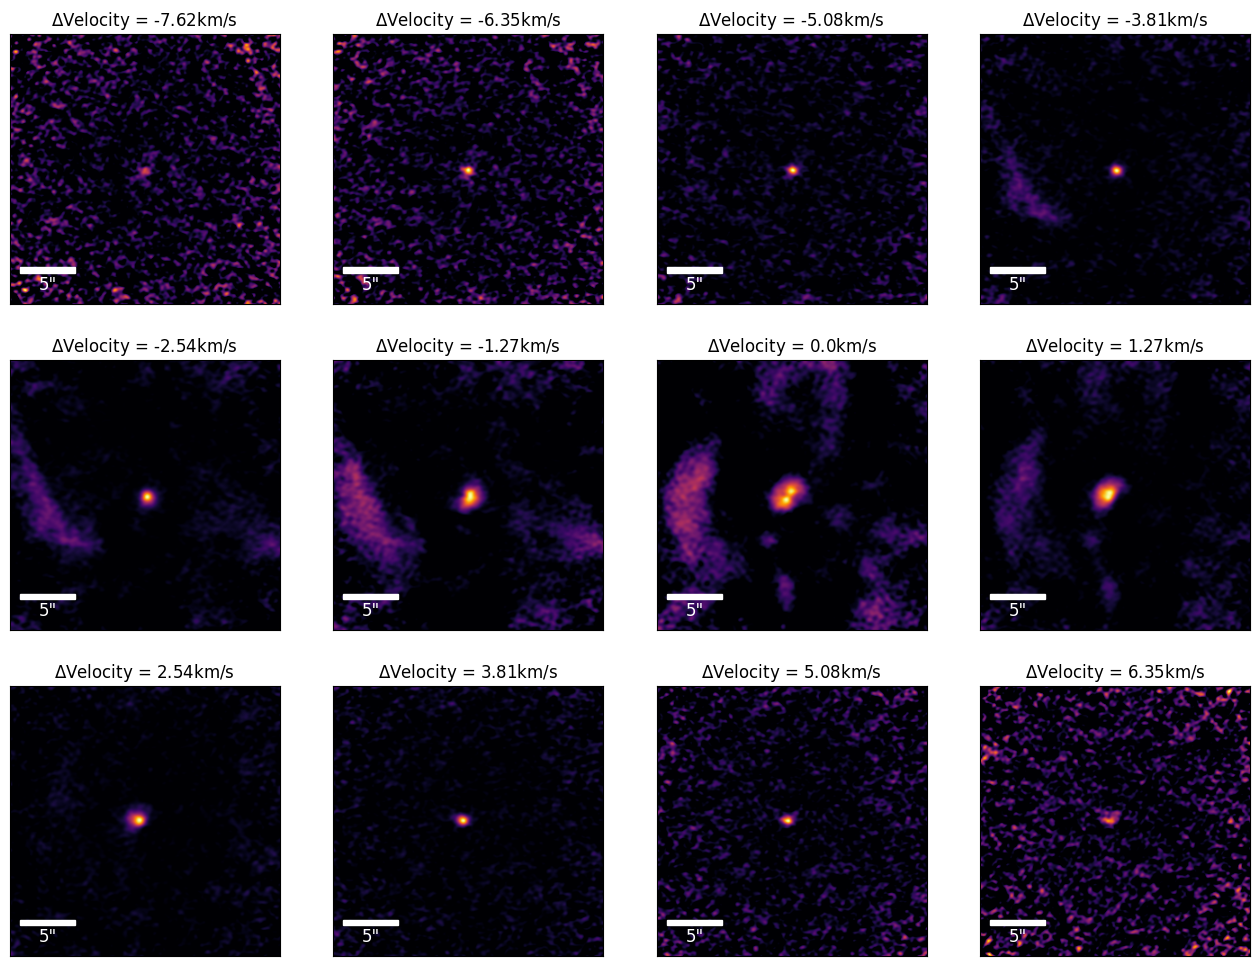

In [75]:
sub_cube_slab = cube.spectral_slab(2.3053e+11 *u.Hz, 2.30536e+11 *u.Hz)

subcubearray = np.array(sub_cube_slab)
#print(subcubearray[0])
m=1
fig, ax = plt.subplots(3,4,figsize=(16*m,12*m),squeeze=True)
imgsize=300
fontprops = fm.FontProperties(size=12)
#fig.supxlabel('$\Delta$RA (arcsec)')
#fig.supylabel('$\Delta$Dec (arcsec)')

for image in range(0,4):
    
    ax[0,image].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
    ax[0,image].imshow(Cutout2D(subcubearray[image+1],(256.5,256.5),(imgsize,imgsize)).data,
                       cmap='inferno',origin='lower',vmin=0,extent=[-0.08172*imgsize/2,0.08172*imgsize/2,
                                                                    -0.08172*imgsize/2,0.08172*imgsize/2])
    ax[0,image].set_title('$\Delta$Velocity = {}km/s'.format((image+1-7)*(1.27)))
    scalebar = AnchoredSizeBar(ax[0,image].transData,
                           5, '5"', 'lower left', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
    ax[0,image].add_artist(scalebar)


for image in range(0,4):
    ax[1,image].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
    ax[1,image].imshow(Cutout2D(subcubearray[image+5],(256.5,256.5),(imgsize,imgsize)).data,
                       cmap='inferno',origin='lower',vmin=0,extent=[-0.08172*imgsize/2,0.08172*imgsize/2,
                                                                    -0.08172*imgsize/2,0.08172*imgsize/2])
    ax[1,image].set_title('$\Delta$Velocity = {}km/s'.format((image+5-7)*(1.27)))
    scalebar = AnchoredSizeBar(ax[1,image].transData,
                           5, '5"', 'lower left', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
    ax[1,image].add_artist(scalebar)

for image in range(0,4):
    ax[2,image].tick_params(
        axis='both',          # changes apply to both axes
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False, 
        left=False,
        right=False,
        labelbottom=False,
        labelleft=False)
    ax[2,image].imshow(Cutout2D(subcubearray[image+9],(256.5,256.5),(imgsize,imgsize)).data,
                       cmap='inferno',origin='lower',vmin=0,extent=[-0.08172*imgsize/2,0.08172*imgsize/2,
                                                                    -0.08172*imgsize/2,0.08172*imgsize/2])
    ax[2,image].set_title('$\Delta$Velocity = {}km/s'.format((image+9-7)*(1.27)))
    scalebar = AnchoredSizeBar(ax[2,image].transData,
                           5, '5"', 'lower left', 
                           pad=0.5,
                           color='white',
                           frameon=False,
                           size_vertical=0.5,
                           fontproperties=fontprops
                           )
    ax[2,image].add_artist(scalebar)


plt.savefig('ALMASlices.pdf',bbox_inches='tight')

In [7]:
#sub_cube_slab.write('fits/ATPyxSubCube.fits', format='fits',overwrite=True)  

In [13]:
data, velax = bm.load_cube('fits/ATPyxSubCube.fits')

smoothed_data = bm.smooth_data(data=data,smooth=1,polyorder=0)
rms = bm.estimate_RMS(data=data, N=1)
rms_smoothed = bm.estimate_RMS(data=smoothed_data, N=1)

print('RMS = {:.1f} mJy/beam (original)'.format(rms * 1e3))
print('RMS = {:.1f} mJy/beam (smoothed)'.format(rms_smoothed * 1e3))

RMS = 6.8 mJy/beam (original)
RMS = 6.8 mJy/beam (smoothed)


In [14]:
user_mask = bm.get_user_mask(data=data, user_mask_path=None)

threshold_mask=bm.get_threshold_mask(data=data,
                                    clip=5,
                                    smooth_threshold_mask=0.0)

channel_mask = bm.get_channel_mask(data=data,
                                   firstchannel=0,
                                   lastchannel=-1)

mask = bm.get_combined_mask(user_mask=user_mask,
                            threshold_mask=threshold_mask,
                            channel_mask=channel_mask,
                            combine='and')
masked_data = smoothed_data * mask

bm.available_collapse_methods()

Available methods are:

	 zeroth       (integrated intensity)
	 first        (intensity weighted average velocity)
	 second       (intensity weighted velocity dispersion)
	 eighth       (peak intensity)
	 ninth        (velocity channel of peak intensity)
	 maximum      (both collapse_eighth and collapse_ninth)
	 quadratic    (quadratic fit to peak intensity)
	 width        (effective width for a Gaussian profile)
	 percentiles  (intesity weighted percentiles)
	 gaussian     (gaussian fit)
	 gaussthick   (gaussian with optically thick core fit)
	 gausshermite (gaussian-hermite expansion fit)
	 doublegauss  (double gaussian fit)

Call the function with `collapse_{method_name}`.


In [15]:
moments = bm.collapse_gaussian(velax=velax, data=masked_data, rms=rms)

100%|███████████████████████████████████████████| 69/69 [00:51<00:00,  1.34it/s]


In [11]:
bm.save_to_FITS(moments=moments, method='gaussian', path='fits/ATPyxSubCube.fits')

Assuming uncertainties in fits/ATPyxSubCube_dgv0.fits.


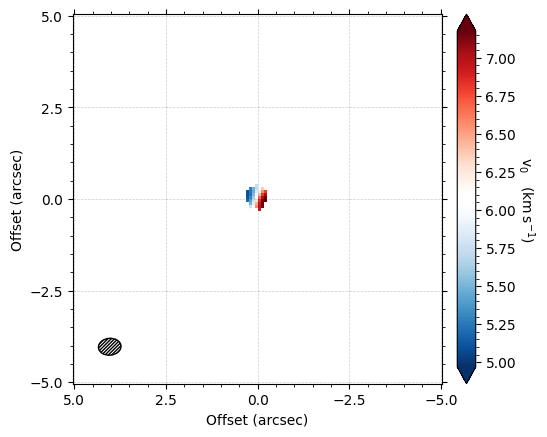

In [12]:
cube = rotationmap(path='fits/ATPyxSubCube_gv0.fits',
                   #uncertainty='fits/ATPyxSubCube_dgv0.fits',
                   #downsample='beam',
                   FOV=10.0)
cube.plot_data()